# Problema da sazonalização

A carga que o consumidor quer contratar para os 12 meses do próximo ano é a carga acima. Ela foi “quantificada” tomando-se como base as cargas históricas de anos passados e também levando-se em consideração algumas ampliações fabris que vão acontecer no próximo ano.

Para a análise simplificada que pretendemos fazer aqui, vamos considerar que a carga a ser contratada é determinística. Ou seja, existe 100% de certeza que serão consumidos esses valores no próximo ano (o consumo não entra no problema como uma variável estocástica).

O PLD mensal que vamos considerar, também por razões de simplificação, é considerado determinístico e não estocástico. Ele foi “quantificado” tomando-se como base os PLDs históricos dos anos passados e também levando-se em consideração algumas suposições de comportamento futuro do PLD.

In [1]:
import numpy as np

consumo_MWmed = np.array([2.20, 3.52, 5.34, 2.70, 8.51, 2.92, 9.58, 12.4, 15.68, 13.95, 5.53, 5.53]) # em MWmed

Numero_horas_mes = np.array([744.00, 672.00, 744.00, 720.00, 744.00, 720.00, 744.00, 744.00, 720.00, 744.00, 720.00, 744.00])

In [2]:
pld = np.array([242.72, 165.98, 109.02, 132.63, 218.70, 336.99, 583.88, 583.88, 577.37, 249.36, 88.10, 66.67]) # em R$/MWh

In [3]:
import matplotlib.pyplot as plt

def graf_sazo(largura,altura,meses,projecao,volume_flat,sazo_contrato,sazo_flat_min,sazo_flat_max,custo_contrato):
    fig, ax = plt.subplots(figsize = (largura,altura))
    ax.grid()
    ax.plot(meses, projecao, color='navy', label='Projeção de consumo', **{'marker': '.'})
    ax.plot(meses, volume_flat, color='green', label='Volume flat', **{'marker': '.'})
    ax.plot(meses, sazo_contrato, color='firebrick', label='Proposta de sazo', **{'marker': '.'})
    ax.fill_between(meses, sazo_flat_min, sazo_flat_max, alpha=.5, linewidth=0, label='Sazo + Flex')
    ax.set_title('Sazonalização | Custo do contrato: R$ {0:.2f}'.format(custo_contrato))
    ax.set_xticks(meses)
    ax.set_xlabel('meses')
    ax.set_ylabel('volume (MWh)')
    ax.legend()
    plt.show()
    
meses = len(consumo_MWmed)

x = np.arange(meses) + 1

volume_flat_mwmed = np.sum(consumo_MWmed) / meses
volume_flat_mwh = volume_flat_mwmed * Numero_horas_mes

projecao_consumo_mwh = consumo_MWmed * Numero_horas_mes

contratos = []

def sazoMinimaMaxima(percentual_sazo):
    sazoMinima = 1 - percentual_sazo
    sazoMaxima = 1 + percentual_sazo
    return sazoMinima , sazoMaxima 

def sazoMinimaMaximaMwh(volume_flat_mwh,sazo_minima,sazo_maxima):
    sazoMinimaMwh = volume_flat_mwh * sazo_minima
    sazoMaximaMwh = volume_flat_mwh * sazo_maxima
    return sazoMinimaMwh , sazoMaximaMwh

def sazoContrato(Numero_horas_mes,quantidade_contrato,percentual_sazo):
    return Numero_horas_mes * quantidade_contrato * (1 + percentual_sazo)

def sazoFlatMinMaxMwh(sazo_contrato,percentual_flex):
    sazoFlatMinMwh = sazo_contrato * (1 - percentual_flex)
    sazoFlatMaxMwh = sazo_contrato * (1 + percentual_flex)
    return sazoFlatMinMwh , sazoFlatMaxMwh

def expoMcpMwh(contrato,consumo):
    return contrato - consumo

def expoMcpReais(exposicaoMmpMwh,pld):
    return np.sum(exposicaoMmpMwh * pld) * -1

def custoContrato(contrato,preco):
    return np.sum(contrato * preco)

def contratoMaisExposicao(custoContratoReais,exposicaoMcpReais):
    return custoContratoReais + exposicaoMcpReais

def melhorContrato(contratos):
    # contrato = 0
    valor = contratos[-1]
    for c,v in enumerate(contratos):
        if v < valor:
            valor = v
            contrato = c
    
    return contrato


**Pergunta-se:** Considerando-se os 4 Contratos disponíveis abaixo, qual é o melhor contrato para esse consumidor???

**CONTRATO-1** \
Quantidade Contrato (MWmed) = 8.0 \
Preço do Contrato (R$/MWh) = 120.0 \
Percentual de Sazo = 0.0 \
Percentual de Flex = 0.0


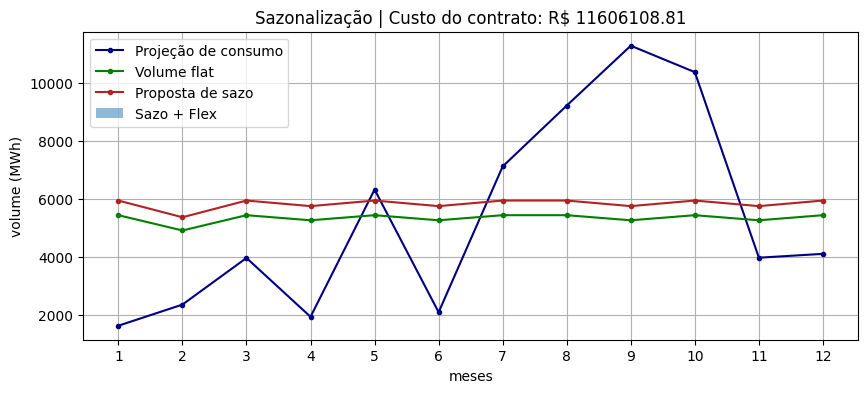

In [4]:

quantidade_contrato = 8
preco_contrato = 120
# quantidade_contrato = 15
# preco_contrato = 140
percentual_sazo = 0
percentual_flex = 0

sazo_minima , sazo_maxima = sazoMinimaMaxima(percentual_sazo)

sazo_minima_mwh , sazo_maxima_mwh = sazoMinimaMaximaMwh(volume_flat_mwh,sazo_minima,sazo_maxima)

sazo_contrato = sazoContrato(Numero_horas_mes,quantidade_contrato,percentual_sazo)

sazo_flat_min_mwh , sazo_flat_max_mwh = sazoFlatMinMaxMwh(sazo_contrato,percentual_flex)

expo_mcp_mwh = expoMcpMwh(sazo_contrato,projecao_consumo_mwh)

total_exposicao_mcp_reais = expoMcpReais(expo_mcp_mwh,pld)

custo_contrato = custoContrato(sazo_contrato,preco_contrato)

custo_mais_exposicao = contratoMaisExposicao(custo_contrato,total_exposicao_mcp_reais)

contratos.append(custo_mais_exposicao)

graf_sazo(10,4,x,projecao_consumo_mwh,volume_flat_mwh,sazo_contrato,sazo_flat_min_mwh,sazo_flat_max_mwh,custo_mais_exposicao)



**CONTRATO-2** \
Quantidade Contrato (MWmed) = 6.0 \
Preço do Contrato (R$/MWh) = 190.0 \
Percentual de Sazo = 0.0 \
Percentual de Flex = 0.3


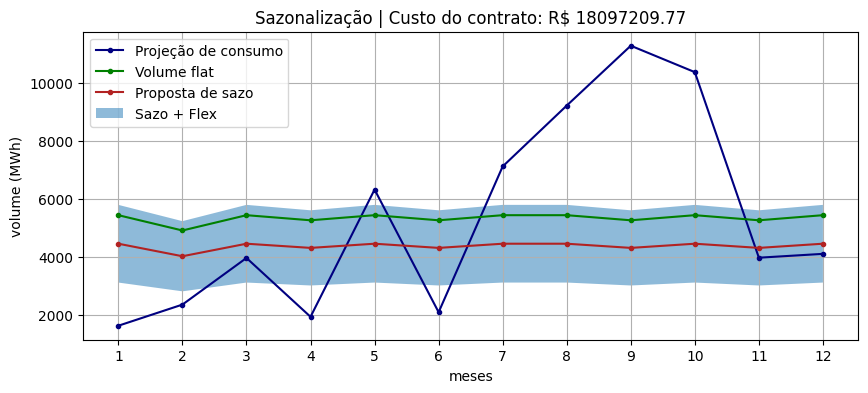

In [5]:
quantidade_contrato = 6.0
preco_contrato = 190.0
percentual_sazo = 0
percentual_flex = 0.3

sazo_minima , sazo_maxima = sazoMinimaMaxima(percentual_sazo)

sazo_minima_mwh , sazo_maxima_mwh = sazoMinimaMaximaMwh(volume_flat_mwh,sazo_minima,sazo_maxima)

sazo_contrato = sazoContrato(Numero_horas_mes,quantidade_contrato,percentual_sazo)

sazo_flat_min_mwh , sazo_flat_max_mwh = sazoFlatMinMaxMwh(sazo_contrato,percentual_flex)

expo_mcp_mwh = expoMcpMwh(sazo_contrato,projecao_consumo_mwh)

total_exposicao_mcp_reais = expoMcpReais(expo_mcp_mwh,pld)

custo_contrato = custoContrato(sazo_contrato,preco_contrato)

custo_mais_exposicao = contratoMaisExposicao(custo_contrato,total_exposicao_mcp_reais)

contratos.append(custo_mais_exposicao)

graf_sazo(10,4,x,projecao_consumo_mwh,volume_flat_mwh,sazo_contrato,sazo_flat_min_mwh,sazo_flat_max_mwh,custo_mais_exposicao)



**CONTRATO-3** \
Quantidade Contrato (MWmed) = 5.0 \
Preço do Contrato (R$/MWh) = 220.0 \
Percentual de Sazo = 0.4 \
Percentual de Flex = 0.0


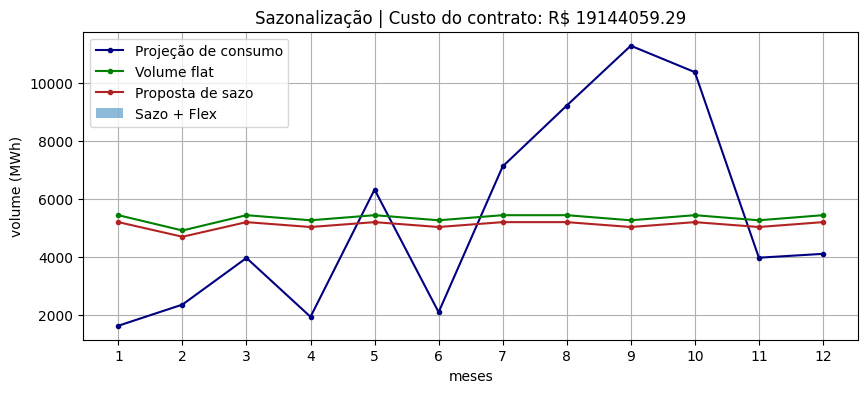

In [6]:
quantidade_contrato = 5
preco_contrato = 220
percentual_sazo = 0.4
percentual_flex = 0

sazo_minima , sazo_maxima = sazoMinimaMaxima(percentual_sazo)

sazo_minima_mwh , sazo_maxima_mwh = sazoMinimaMaximaMwh(volume_flat_mwh,sazo_minima,sazo_maxima)

sazo_contrato = sazoContrato(Numero_horas_mes,quantidade_contrato,percentual_sazo)

sazo_flat_min_mwh , sazo_flat_max_mwh = sazoFlatMinMaxMwh(sazo_contrato,percentual_flex)

expo_mcp_mwh = expoMcpMwh(sazo_contrato,projecao_consumo_mwh)

total_exposicao_mcp_reais = expoMcpReais(expo_mcp_mwh,pld)

custo_contrato = custoContrato(sazo_contrato,preco_contrato)

custo_mais_exposicao = contratoMaisExposicao(custo_contrato,total_exposicao_mcp_reais)

contratos.append(custo_mais_exposicao)

graf_sazo(10,4,x,projecao_consumo_mwh,volume_flat_mwh,sazo_contrato,sazo_flat_min_mwh,sazo_flat_max_mwh,custo_mais_exposicao)



**CONTRATO-4** \
Quantidade Contrato (MWmed) = 8.0 \
Preço do Contrato (R$/MWh) = 240.0 \
Percentual de Sazo = 0.5 \
Percentual de Flex = 0.5

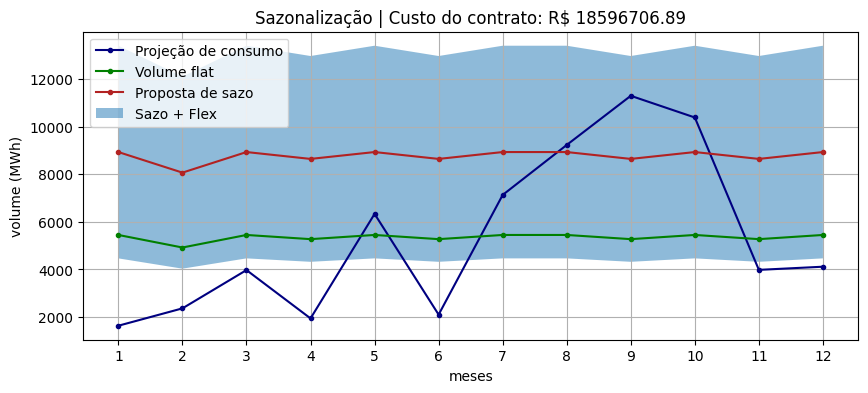

[11606108.8104, 18097209.770400003, 19144059.2904, 18596706.8904]
Melhor Contrato: CONTRATO  0


In [7]:
quantidade_contrato = 8
preco_contrato = 240
percentual_sazo = 0.5
percentual_flex = 0.5

sazo_minima , sazo_maxima = sazoMinimaMaxima(percentual_sazo)

sazo_minima_mwh , sazo_maxima_mwh = sazoMinimaMaximaMwh(volume_flat_mwh,sazo_minima,sazo_maxima)

sazo_contrato = sazoContrato(Numero_horas_mes,quantidade_contrato,percentual_sazo)

sazo_flat_min_mwh , sazo_flat_max_mwh = sazoFlatMinMaxMwh(sazo_contrato,percentual_flex)

expo_mcp_mwh = expoMcpMwh(sazo_contrato,projecao_consumo_mwh)

total_exposicao_mcp_reais = expoMcpReais(expo_mcp_mwh,pld)

custo_contrato = custoContrato(sazo_contrato,preco_contrato)

custo_mais_exposicao = contratoMaisExposicao(custo_contrato,total_exposicao_mcp_reais)

contratos.append(custo_mais_exposicao)

graf_sazo(10,4,x,projecao_consumo_mwh,volume_flat_mwh,sazo_contrato,sazo_flat_min_mwh,sazo_flat_max_mwh,custo_mais_exposicao)

print(contratos)
print('Melhor Contrato: CONTRATO ',melhorContrato(contratos))


# Problema das Moedas Correlacionadas

Dois amigos, João e José, estão jogando com duas moedas. Só que essas moedas são correlacionadas. Para a Moeda 1 há 30% de chance de que seja sorteado o valor “CARA”. Se para a Moeda 1 for sorteado o valor “CARA”, há 60% de chance de que seja sorteado o valor “CARA” para a Moeda 2. Ou seja, as moedas estão correlacionadas.

O jogo é o seguinte: Se após o lançamento das 2 moedas saírem dois valores “CARA” quem leva o dinheiro da aposta é o João. E se após o lançamento das 2 moedas saírem dois valores “COROA” quem leva o dinheiro da aposta é o José. Se saírem valores “CARA” e “COROA”, não há vencedores.

Você consegue fazer uma Simulação de Monte Carlo para determinar quem tem maior probabilidade de ganhar o jogo???

In [8]:
# Problema das moedas correlacionadas

import random

duplo_cara = 0
duplo_coroa = 0
cara_coroa = 0
amostra = 100000

for i in range(amostra):
    moeda1 = random.choice(['H','H','H','T','T','T','T','T','T','T'])
    if moeda1 == 'H':
        moeda2 = random.choice(['H','H','H','H','H','H','T','T','T','T'])
    else:
        moeda2 = random.choice(['H','H','H','T','T','T','T','T','T','T'])
        # moeda2 = random.choice(['H','T'])
    
    if moeda1 + moeda2 == 'HH':
        duplo_cara += 1 # duplo_cara = duplo_cara + 1
    elif moeda1 + moeda2 == 'TT':
        duplo_coroa += 1 # duplo_coroa = duplo_coroa + 1
    else:
        cara_coroa += 1 # cara_coroa = cara_coroa + 1

prob_duplo_cara = duplo_cara / amostra * 100
prob_duplo_coroa = duplo_coroa / amostra * 100
prob_cara_coroa = cara_coroa / amostra * 100
total = prob_duplo_cara + prob_duplo_coroa + prob_cara_coroa

print('''Probabilidade de dar CARA + CARA: {0:.2f}%\n
Probabilidade de dar COROA + COROA: {1:.2f}%\n
Probabilidade de ninguem vencer: {2:.2f}%\n
Total: {3:.2f}%'''.format(prob_duplo_cara,prob_duplo_coroa,prob_cara_coroa,total)
)


Probabilidade de dar CARA + CARA: 18.14%

Probabilidade de dar COROA + COROA: 48.82%

Probabilidade de ninguem vencer: 33.04%

Total: 100.00%
